In [ ]:
# Libraries
import sympy as sp 
from sympy import parse_expr
import numpy as np
import matplotlib.pyplot as plt

# Soluciones Computacionales a Problemas de Ingeniería IST4360




*   Estudiantes: Nathalia María Quintana García - María Silvana Suárez Alvarado
*   Código: 200162663 - 200162233



## Ejercicio 1
La función $f(x) = \tan (\pi x) -6$ tiene una raíz en $(1/\pi)\arctan (6)$. Escoja tres métodos de su preferencia, fije los valores iniciales a usar en cada uno y haga un máximo de 10 iteraciones. ¿Cuál de los métodos se desempeña mejor?¿Por qué?

In [ ]:
x = parse_expr('x')
f = parse_expr("tan(pi * x) - 6")

iteraciones_maximas = 10

In [ ]:
#@title newton

punto_inicial = np.pi / 3

i = 0
errores = []

derivada = sp.diff(f, x, 1)

while i < iteraciones_maximas: 

  punto_siguiente = punto_inicial - f.subs(x, punto_inicial).evalf() / derivada.subs(x, punto_inicial).evalf() 

  error_actual = np.abs((punto_siguiente - punto_inicial) / punto_siguiente)

  punto_inicial = punto_siguiente
  i = i + 1

  errores.append(error_actual)

print(f"f({punto_siguiente}) = {f.subs(x, punto_siguiente).evalf()}")

f(7.44743154332781) = 4.54030274149884E-9


Text(0.5, 0, 'iteraciones')

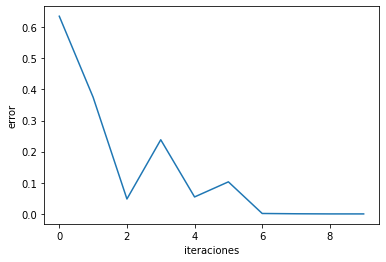

In [ ]:
plt.plot(errores)

plt.ylabel("error")
plt.xlabel("iteraciones")

In [ ]:
#@title secante

punto_inicial = 0.1
punto_parcial = 0.2

i = 0 
errores_2 = []

while i < iteraciones_maximas: 

  punto_siguiente = punto_parcial - f.subs(x, punto_parcial).evalf() * (punto_parcial - punto_inicial) / (f.subs(x, punto_parcial).evalf() - f.subs(x, punto_inicial).evalf())
  punto_inicial, punto_parcial = punto_parcial, punto_siguiente 

  error_actual = np.abs((punto_siguiente - punto_inicial) / punto_siguiente)

  errores_2.append(error_actual)

  i = i + 1

print(f"f({punto_parcial}) = {f.subs(x, punto_parcial).evalf()}")

f(-104.587195159176) = -2.44122524583855


Text(0.5, 0, 'iteraciones')

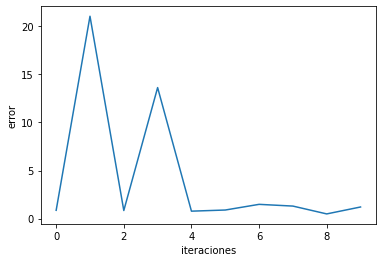

In [ ]:
plt.plot(errores_2)

plt.ylabel("error")
plt.xlabel("iteraciones")

In [ ]:
#@title bisection
a = 0
b = 0.5

i = 0
c_anterior = 0

c_valores = []

errores_3 = []

while i < iteraciones_maximas: 
  
  c_actual = (a + b) / 2

  c_valores.append(c_actual)

  if (f.subs(x,c_actual).evalf() == 0.0):

    break

  elif (f.subs(x,c_actual).evalf() * f.subs(x,a).evalf() < 0):

    b = c_actual

  else:

    a = c_actual
  
  error_actual = np.abs((c_actual - c_anterior) / c_actual)

  errores_3.append(error_actual)

  c_anterior = c_actual

  i = i + 1

print(f"f({c_actual}) = {f.subs(x, c_actual).evalf()}")

f(0.44775390625) = 0.0377002195545230


Text(0.5, 0, 'iteraciones')

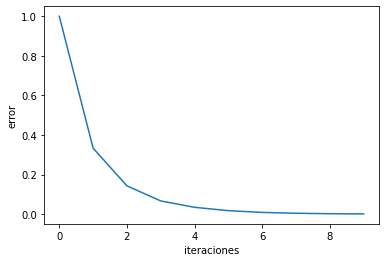

In [ ]:
plt.plot(errores_3)

plt.ylabel("error")
plt.xlabel("iteraciones")

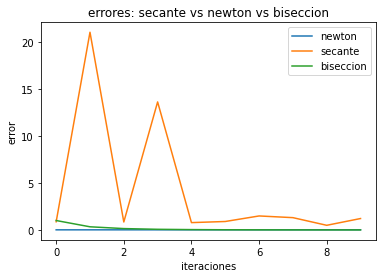

In [ ]:
plt.plot(errores, label="newton")
plt.plot(errores_2, label="secante")
plt.plot(errores_3, label="biseccion")

plt.ylabel("error")
plt.xlabel("iteraciones")
plt.title("errores: secante vs newton vs biseccion")

plt.legend()

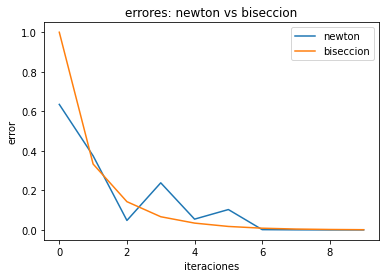

In [ ]:
plt.plot(errores, label="newton")
plt.plot(errores_3, label="biseccion")

plt.ylabel("error")
plt.xlabel("iteraciones")
plt.title("errores: newton vs biseccion")

plt.legend()

Al observar el desempeño de los 3 algoritmos (iteraciones vs error) podemos evidenciar que el método secante, con sus repectivas predicciones anteriores a resolver el problema, tiene un error que varía demasiado para las primeras 4 iteraciones, aunque luego se minimice y se mantenga en un rango mucho menor donde la variación no es demasiado se puede observar que los métodos de newton y bisección tienen mejor rendimiento, por tanto, podemos descartar el método de la secante. Al observar la gráfica de iteraciones vs errores de los métodos newton y bisección se puede evidenciar que la diferencia entre ambos es casi que idéntica, sin embargo, al compararlas en un solo gráfico considerando esas dos se puede observar que el comportamiento del error para bisección es exponencial decreciente mientras que newton tiene partes lineales y otras que varían, pero al final el error es muy similar para ambas a partir de la 6ta iteración. Por otro lado, al observar las raíces calculadas el método newton parece tener una aproximación bastante decente, sin embargo, muy lejos de la raíz propuesta en el enunciado, caso contrario al método de bisección que se acerca demasiado a dicha solución propuesta en el enunciado con un error de precisión del 0.0007. Por tanto, el mejor método por el comportamiento del error y su aproximación a la raíz propuesta es el de bisección.

## Ejercicio 2
La probabilidad de que en un juego de Racquetball (con dos jugadores A y B) el jugador A gane con un puntaje 21-0 viene dada por la expresión:
$$P=\frac{1+p}{2}\left(\frac{p}{1-p+p^2}\right)^{21},$$
donde $p$ denota la probabilidad de que el jugador A gane cualquier juego (indenpendiente del saque). Determine con una tolerancia de $10^{-3}$ el mínimo valor de $p$ tal que A ganará en al menos la mitad de los juegos con B.

In [ ]:
x = parse_expr("x")
f = ((1 + x) / 2) * (x / (1 - x - x**2)) ** 21

punto_inicial = 0.75
i = 0
errores = []

derivada = sp.diff(f, x, 1)

while i < iteraciones_maximas: 

  punto_siguiente = punto_inicial - f.subs(x, punto_inicial).evalf() / derivada.subs(x, punto_inicial).evalf() 

  error_actual = np.abs((punto_siguiente - punto_inicial) / punto_siguiente)

  punto_inicial = punto_siguiente
  i = i + 1

  errores.append(error_actual)

print(f"p = {punto_siguiente}")

p = 0.845537748627118


## Ejercicio 3
La función $f(x) = 4x^2-e^{x}-e^{-x}$ tiene dos raíces positivas $x_{1},\, x_{2}$, use el método de Newton para aproximar estos valores con una tolerancia de $10^{-6}$.

In [ ]:
x = parse_expr("x")
f = 4 * x ** 2 - sp.exp(x) - sp.exp(-x)

punto_inicial = 1

tolerancia = 1 * 10 ** -6

raices = set()

derivada = sp.diff(f, x, 1)

while True:

    error_actual = 1
    
    if len(raices) == 2: break

    while error_actual > tolerancia: 

        punto_siguiente = punto_inicial - f.subs(x, punto_inicial).evalf() / derivada.subs(x, punto_inicial).evalf() 
        
        error_actual = np.abs((punto_siguiente - punto_inicial) / punto_siguiente)

        punto_inicial = punto_siguiente

    raices.add(punto_siguiente)
    
    punto_inicial = punto_siguiente + 2.5

In [ ]:
raices

{0.824498585291139, 4.30624527352011}

In [ ]:
for i in raices: print(f"f({i}) = {f.subs(x, i).evalf()}")

f(4.30624527352011) = 0
f(0.824498585291139) = 0


**Nota:** Por favor incluir en el archivo que contenga la solución los script, funciones, gráficas, código y cualquier otro elemento utilizado. No coloque respuestas sin justificación, muestre todo los desarrollos.

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte ([pdf](https://guayacan.uninorte.edu.co/normatividad_interna/upload/File/Guia_Prevencion_Fraude%20estudiantes(5).pdf)).